Here we identify a clique to simulate. Then we ablate the network, removing all other neurons outside the clique (with the option to also remove direct connections from sink to source). Then we simulate the network, by inject a current into the source, and see the response in the sink. This activity is then modulated by also injecting currents into various middle neurons.

The network has been created previously. The network synapses are exported using 
```Snudda/snudda/utils/export_connection_matrix.py topology100/network_synapses.hdf5 topology100 test100.csv```

The ```csv``` is then converted to flagser using ```fromcsv2flagser.py```, then ```./flagsercount.py test100.flagser```

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example."

network_path = "topology100"
network_file = os.path.join(network_path, "network-synapses.hdf5")
simplex_file_name = os.path.join(network_path, "topology100_D6_simplices0.simplices")
ablated_network_file = os.path.join(network_path, "network-ablated.hdf5")

remove_sink_to_source_connections = True

In [2]:
from snudda.analyse.analyse_topology import SnuddaAnalyseTopology
sat = SnuddaAnalyseTopology(network_file=network_file)
sat.load_simplex_file(simplex_file_name=simplex_file_name)

Loading 99 neurons with 6999 synapses and 0 gap junctions
Loading 99 neurons with 6999 synapses and 0 gap junctions
Loaded simplex data of dimension 6 from topology100/topology100_D6_simplices0.simplices


We can count the multiplicity of the cliques, which is the number of different cliques that the same neurons form. 

In [3]:
mult_unfixed=sat.get_multiplicity()
sat.print_multiplicity(fixed=False)

-- Analysing dimension 6
Multiplicity 1 for 204 simplices
Multiplicity 2 for 235 simplices
Multiplicity 3 for 121 simplices
Multiplicity 4 for 83 simplices
Multiplicity 5 for 26 simplices
Multiplicity 6 for 73 simplices
Multiplicity 7 for 18 simplices
Multiplicity 8 for 19 simplices
Multiplicity 9 for 23 simplices
Multiplicity 10 for 13 simplices
Multiplicity 11 for 6 simplices
Multiplicity 12 for 23 simplices
Multiplicity 13 for 4 simplices
Multiplicity 14 for 9 simplices
Multiplicity 15 for 3 simplices
Multiplicity 16 for 2 simplices
Multiplicity 17 for 2 simplices
Multiplicity 18 for 5 simplices
Multiplicity 20 for 4 simplices
Multiplicity 21 for 3 simplices
Multiplicity 22 for 4 simplices
Multiplicity 26 for 2 simplices
Multiplicity 27 for 1 simplices
Multiplicity 28 for 4 simplices
Multiplicity 30 for 1 simplices
Multiplicity 33 for 2 simplices
Multiplicity 34 for 1 simplices
Multiplicity 36 for 1 simplices
Multiplicity 39 for 1 simplices
Multiplicity 40 for 1 simplices
Multiplici

We can also count the multiplicity of the cliques which have fixed source and sink.  

In [4]:
mult = sat.get_fixed_multiplicity()
sat.print_multiplicity(fixed=True)

-- Analysing dimension 6
Multiplicity 1 for 596 simplices
Multiplicity 2 for 430 simplices
Multiplicity 3 for 223 simplices
Multiplicity 4 for 118 simplices
Multiplicity 5 for 53 simplices
Multiplicity 6 for 56 simplices
Multiplicity 7 for 34 simplices
Multiplicity 8 for 21 simplices
Multiplicity 9 for 8 simplices
Multiplicity 10 for 21 simplices
Multiplicity 11 for 13 simplices
Multiplicity 12 for 5 simplices
Multiplicity 14 for 4 simplices
Multiplicity 15 for 2 simplices
Multiplicity 18 for 2 simplices



Let's list the cliques of dimention 6 containing 4 dSPN and 3 iSPN. The dimention of a clique is the number of neurons contained in the clique minus 1.

In [5]:
filt_mult = sat.filter_multiplicity(mult, dimension=6,
            neuron_type_list=[["dSPN", 4], ["iSPN", 3]],
            multiplicity_requirement=None)

In [6]:
filt_mult

OrderedDict([((19, 21, 30, 41, 62, 97, 71), 2),
             ((19, 21, 24, 30, 33, 62, 71), 2),
             ((21, 5, 30, 72, 80, 84, 71), 2),
             ((21, 7, 30, 42, 80, 84, 71), 1),
             ((24, 21, 30, 33, 42, 84, 71), 1),
             ((24, 21, 33, 54, 62, 84, 71), 1),
             ((54, 21, 24, 33, 62, 84, 71), 1),
             ((70, 21, 30, 41, 72, 97, 71), 4),
             ((70, 33, 37, 40, 72, 75, 30), 2),
             ((70, 23, 30, 41, 75, 97, 72), 1),
             ((70, 23, 41, 72, 75, 97, 30), 2),
             ((79, 21, 24, 30, 33, 62, 71), 2),
             ((79, 23, 33, 62, 75, 80, 30), 4),
             ((79, 24, 30, 33, 62, 80, 71), 2),
             ((79, 21, 30, 33, 62, 80, 71), 1),
             ((79, 43, 51, 65, 76, 96, 56), 1),
             ((80, 5, 21, 30, 72, 84, 71), 2),
             ((80, 7, 21, 30, 42, 84, 71), 3),
             ((80, 21, 24, 30, 62, 84, 71), 2),
             ((80, 21, 24, 30, 33, 62, 71), 2),
             ((80, 24, 30, 33, 42, 84, 71), 

It is also possible to fix the multiplicity. For example among the cliques containing 4 dSPN and 3 iSPN, we can select only those of multiplicity 2

In [7]:
filt_mult = sat.filter_multiplicity(mult, dimension=6,
            neuron_type_list=[["dSPN", 4], ["iSPN", 3]],
            multiplicity_requirement=2)

In [8]:
filt_mult

OrderedDict([((19, 21, 30, 41, 62, 97, 71), 2),
             ((19, 21, 24, 30, 33, 62, 71), 2),
             ((21, 5, 30, 72, 80, 84, 71), 2),
             ((70, 33, 37, 40, 72, 75, 30), 2),
             ((70, 23, 41, 72, 75, 97, 30), 2),
             ((79, 21, 24, 30, 33, 62, 71), 2),
             ((79, 24, 30, 33, 62, 80, 71), 2),
             ((80, 5, 21, 30, 72, 84, 71), 2),
             ((80, 21, 24, 30, 62, 84, 71), 2),
             ((80, 21, 24, 30, 33, 62, 71), 2),
             ((97, 21, 30, 41, 70, 72, 71), 2)])

In this example, we study a clique of dimention 6 containing 3 dSPN, 3 iSPN and 1 FS. 

In [9]:
filt_mult = sat.filter_multiplicity(mult, dimension=6,
            neuron_type_list=[["dSPN", 3], ["iSPN", 3], ["FS",1]],
            multiplicity_requirement=None)

In [10]:
filt_mult

OrderedDict([((92, 26, 43, 65, 95, 96, 33), 1),
             ((92, 33, 43, 82, 95, 96, 56), 1),
             ((92, 43, 56, 82, 95, 96, 33), 1)])

Let's select the first clique containing 3 dSPN, 3 iSPN and 1 FS

In [11]:
selected_clique_neurons = list(filt_mult)[0]

In [12]:
selected_clique_neurons

(92, 26, 43, 65, 95, 96, 33)

We can double check that this selected clique contains the neurons we requested.

In [13]:
from snudda.utils.load import SnuddaLoad
sl=SnuddaLoad(network_file=network_file)
sl.get_neuron_types(neuron_id=selected_clique_neurons)

Loading 99 neurons with 6999 synapses and 0 gap junctions


['FS', 'iSPN', 'dSPN', 'dSPN', 'iSPN', 'iSPN', 'dSPN']

### Ablating network

In [14]:
from snudda.utils.ablate_network import SnuddaAblateNetwork
san = SnuddaAblateNetwork(network_file=network_file)
san.only_keep_neuron_id(selected_clique_neurons)

Loading 99 neurons with 6999 synapses and 0 gap junctions


The cell below removes sink to source connections if the ```remove_sink_to_source``` flag is set.

In [15]:
if remove_sink_to_source_connections:
    for pre_id in selected_clique_neurons[1:]:
        san.remove_pair_connection(pre_id=pre_id, post_id=selected_clique_neurons[0])

Note that the neurons get remapped, when we ablate the network and remove a subset of the neurons.

In [16]:
san.write_network(out_file_name=ablated_network_file, print_remapping=True)

Writing to topology100/network-ablated.hdf5
Copying morphologies
Keeping 7 neurons.

Remapping neurons:
92 -> 0
26 -> 1
43 -> 2
65 -> 3
95 -> 4
96 -> 5
33 -> 6

0/6999 synapses processed
6999/6999 synapses processed
Warning, removing individual synapses (6) can be slow, use this with caution.
Filtering done.
0/0 synapses processed
Warning, removing individual synapses (6) can be slow, use this with caution.
Filtering done.
Copying synapses and gap junctions
71 / 71 synapse rows parsed
Synapse matrix written.
Keeping 71 synapses (out of 6999)
0 / 0 gap junction rows parsed
Gap junction matrix written.
Keeping 0  gap junctions (out of 0)


### Simulating network

Next step is running the network with current injections (we should also run it with synaptic input).

In [17]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/caldyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cap_ch.mod" "../../../../BasalGangliaData/data//neurons

In [18]:
experiment_config_file = "topology_clique_simulation_experiment-6.json"
from snudda.simulate.pair_recording import PairRecording 
pr = PairRecording(network_path=network_path, network_file=ablated_network_file,
                   experiment_config_file=experiment_config_file)

Pair recording output file: topology100/simulation/TCS-output-6.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Setting tmGabaA reversal potential to -65.0 mV


In [19]:
pr.run()

Running simulation for 1.0 s
Running Neuron simulator 1000 ms, with dt=0.025
1% done. Elapsed: 0.5 s, estimated time left: 46.9 s
99% done. Elapsed: 45.7 s, estimated time left: 0.5 s
Neuron simulation finished
Simulation run time: 46.2 s
Writing network output to topology100/simulation/TCS-output-6.hdf5
CHeck why not able to save...
Using sample dt = None (sample step size None)
Worker 1/1 writing data to topology100/simulation/TCS-output-6.hdf5


### Plotting

Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6]
Plotted 7 traces (total 7)


<IPython.core.display.Javascript object>


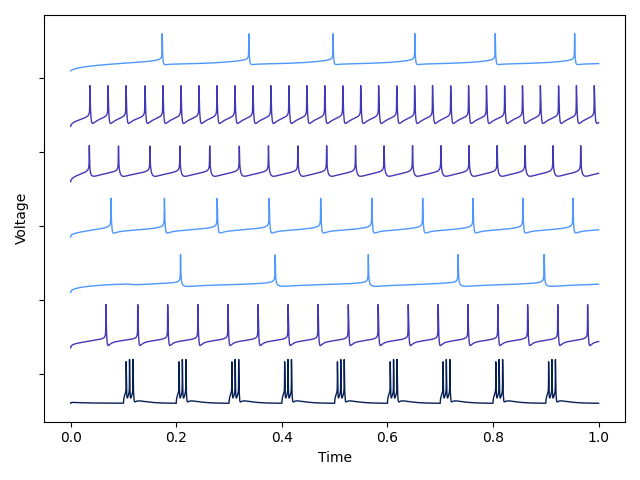

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Network-voltage-trace-TopologyClique-6-dSPN-FS-iSPN.pdf


In [20]:
%matplotlib notebook
pr.plot_trace_overview()

Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.05 s from the plot
Plotting traces: [1]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


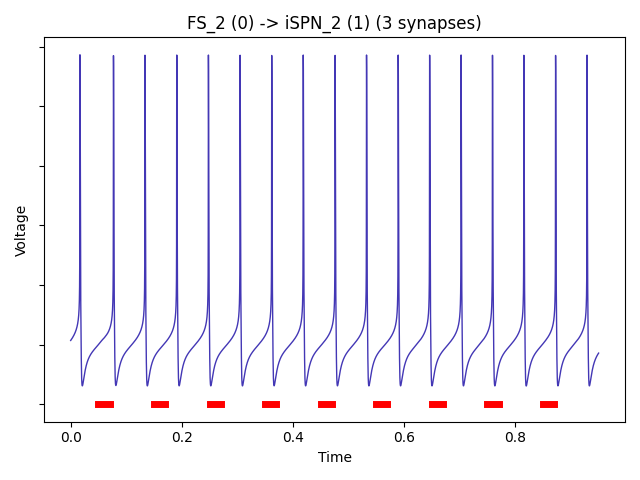

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-0-post-1.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.05 s from the plot
Plotting traces: [2]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


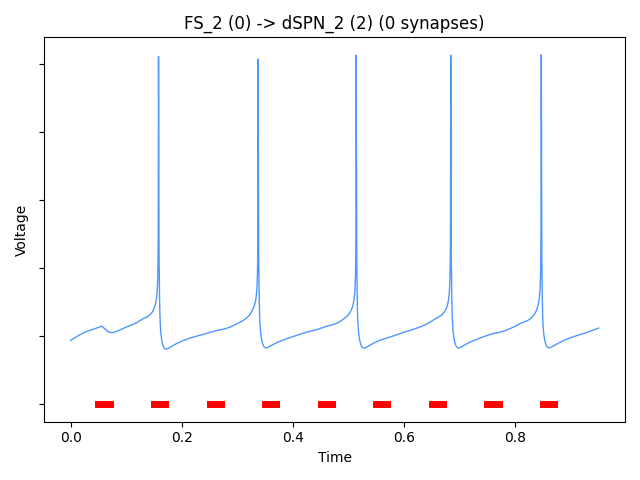

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-0-post-2.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.05 s from the plot
Plotting traces: [3]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


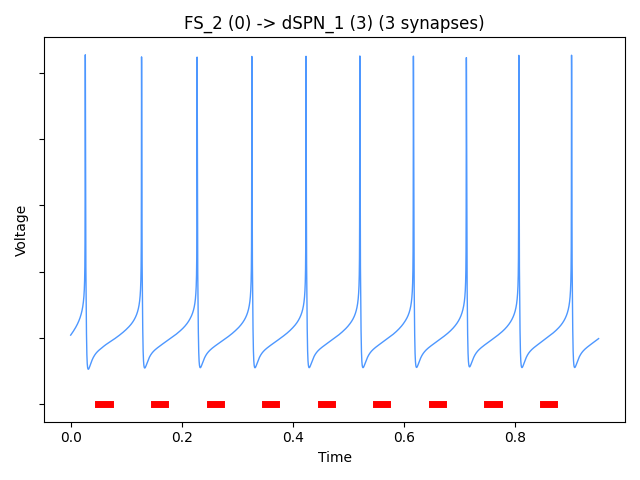

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-0-post-3.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.05 s from the plot
Plotting traces: [4]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


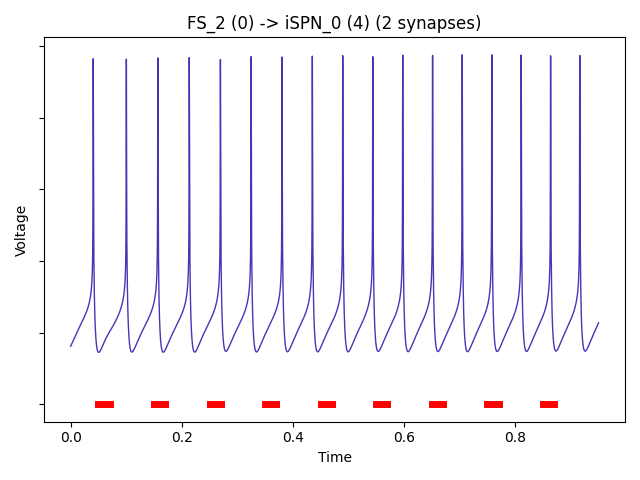

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-0-post-4.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.05 s from the plot
Plotting traces: [5]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


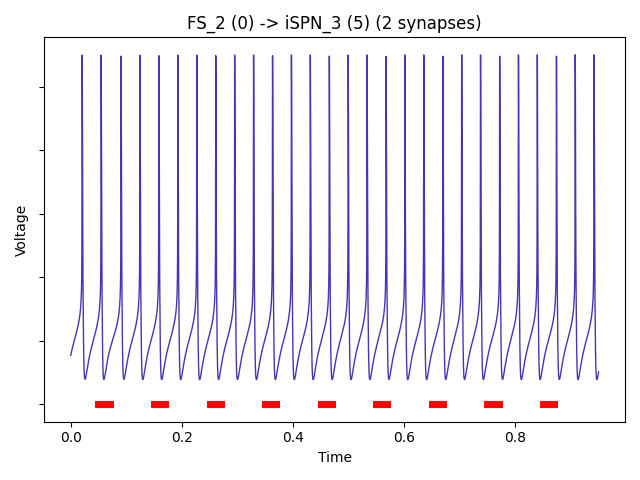

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-0-post-5.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.05 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


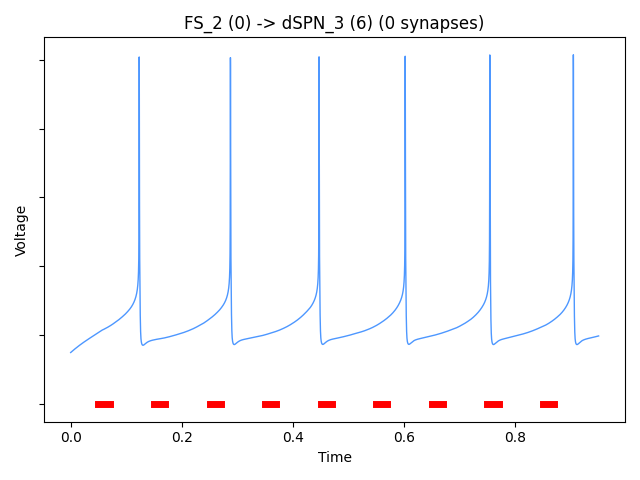

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-0-post-6.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [2]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


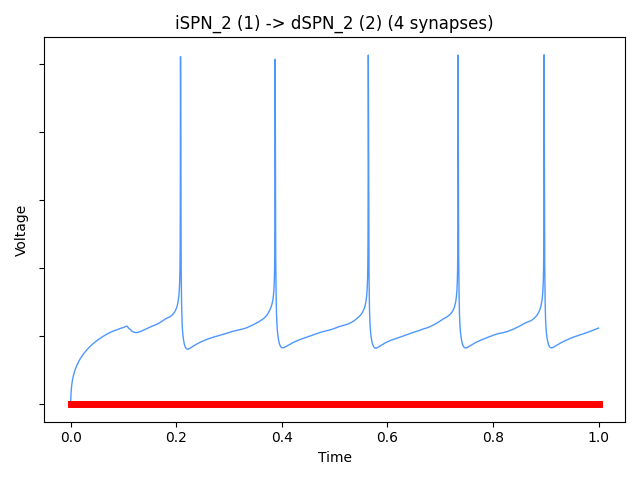

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-1-post-2.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [3]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


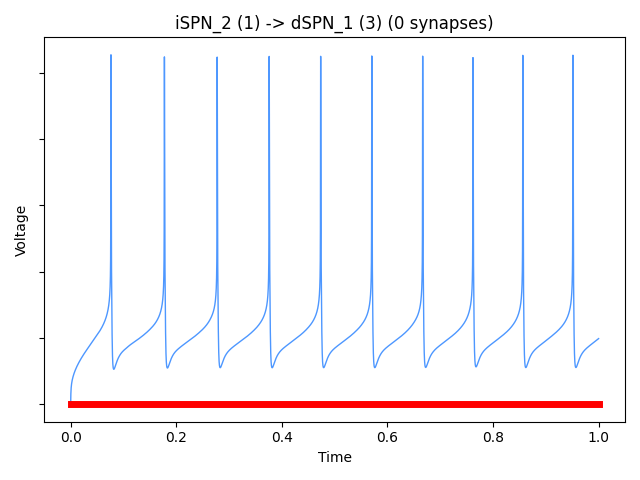

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-1-post-3.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


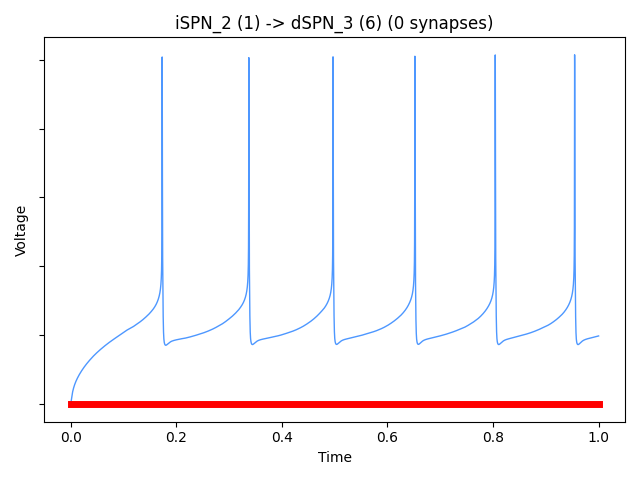

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-1-post-6.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


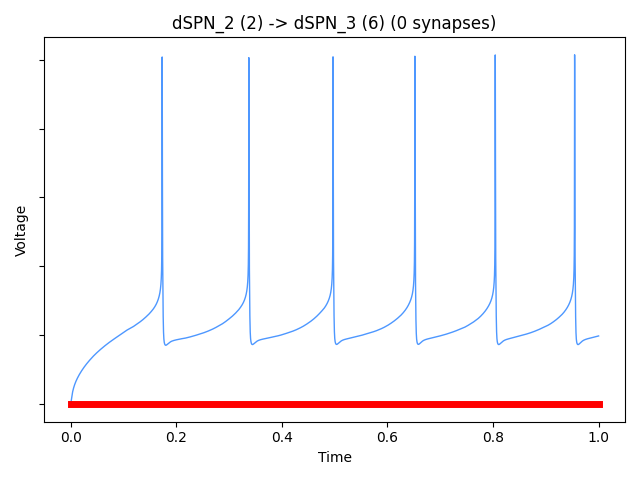

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-2-post-6.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [2]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


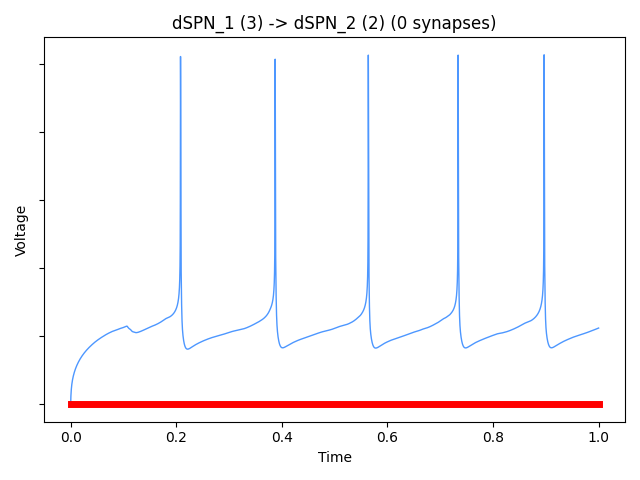

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-3-post-2.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


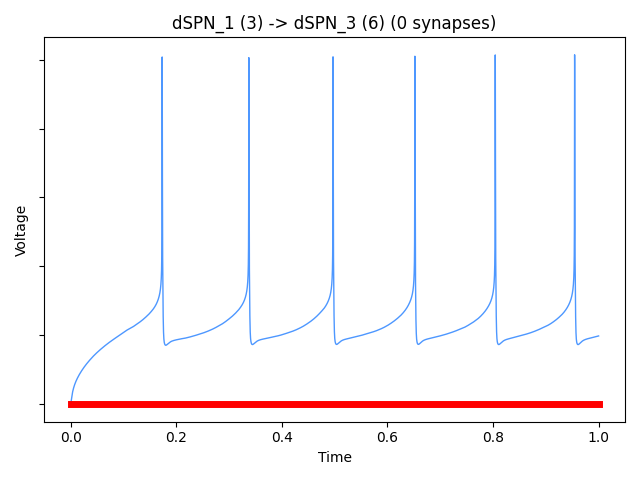

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-3-post-6.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [1]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


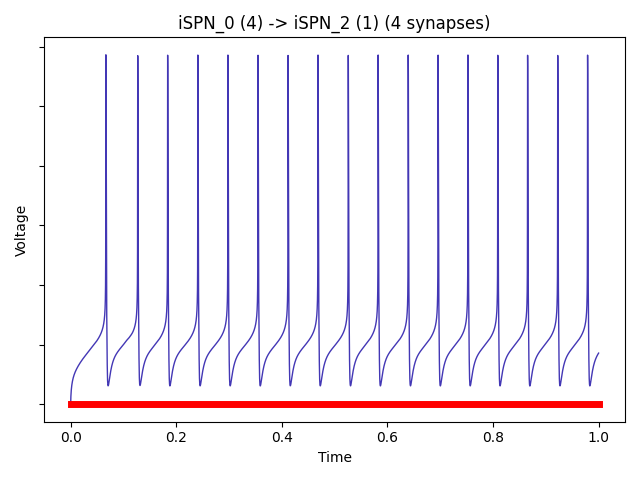

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-4-post-1.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [2]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


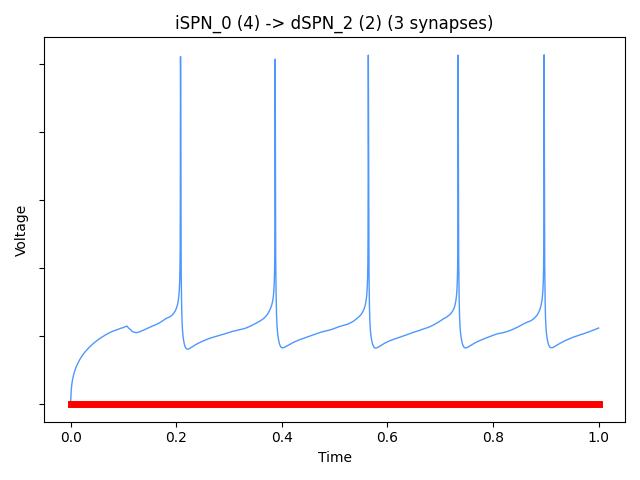

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-4-post-2.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [3]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


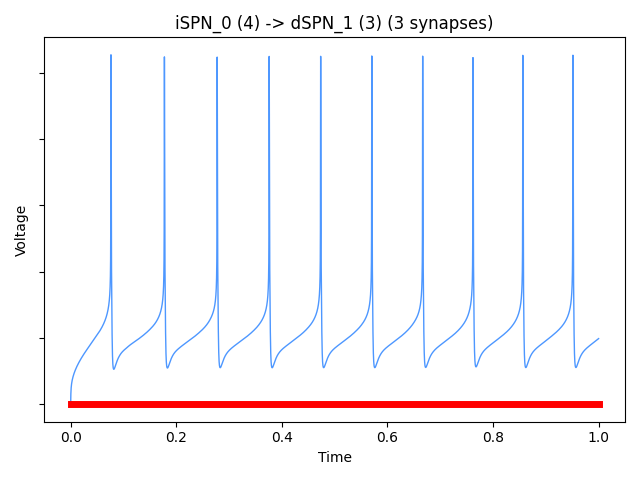

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-4-post-3.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


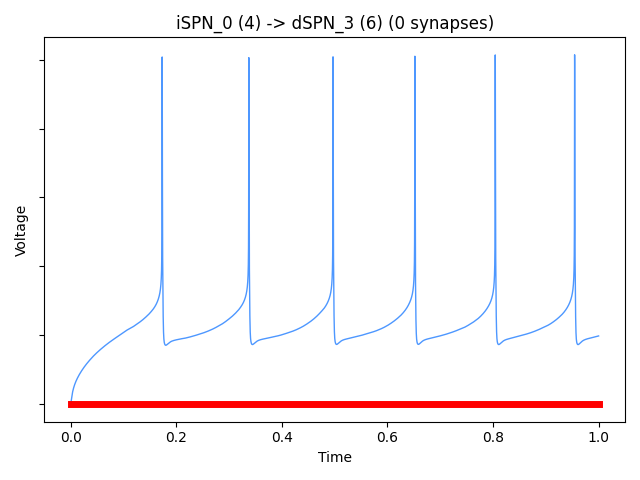

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-4-post-6.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [1]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


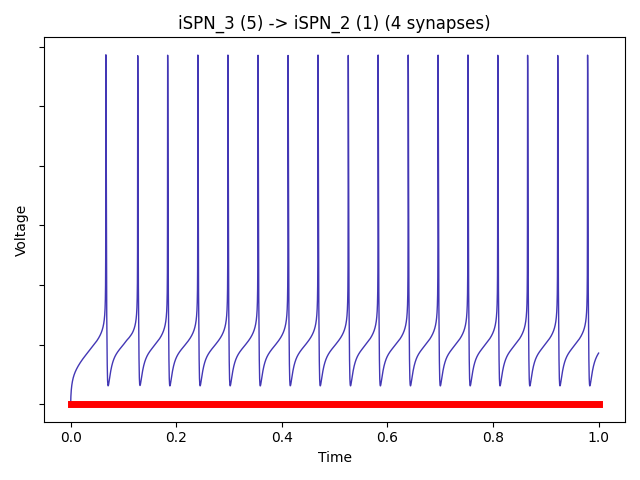

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-5-post-1.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [2]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


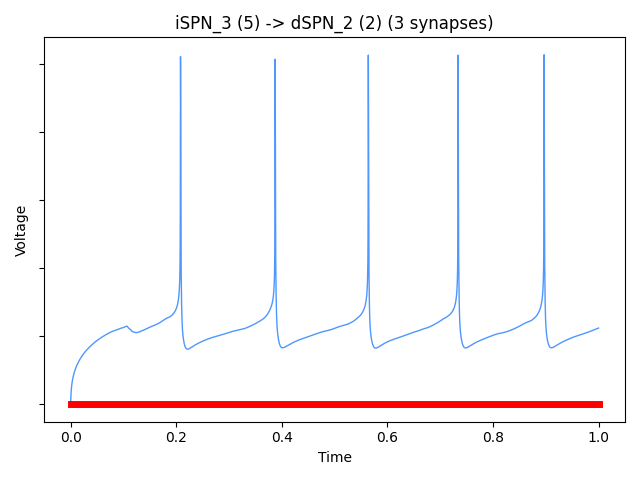

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-5-post-2.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [3]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


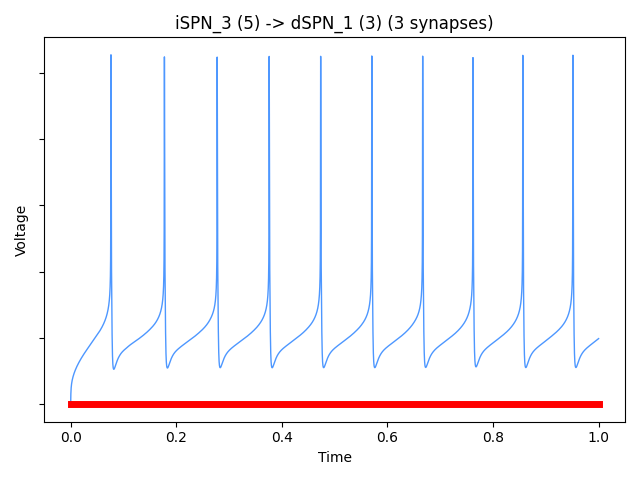

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-5-post-3.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [4]
Plotted 1 traces (total 7)


/home/ilaria/Documents/GitHubSSH/Snudda/snudda/plotting/plot_traces.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=fig_size)


<IPython.core.display.Javascript object>


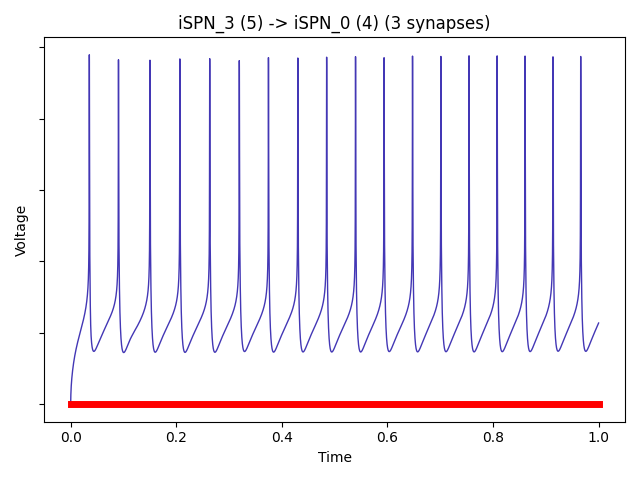

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-5-post-4.pdf
Loading network info from topology100/network-ablated.hdf5
Loading 7 neurons with 71 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6.hdf5
!!! Excluding first 0.0 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 7)


<IPython.core.display.Javascript object>


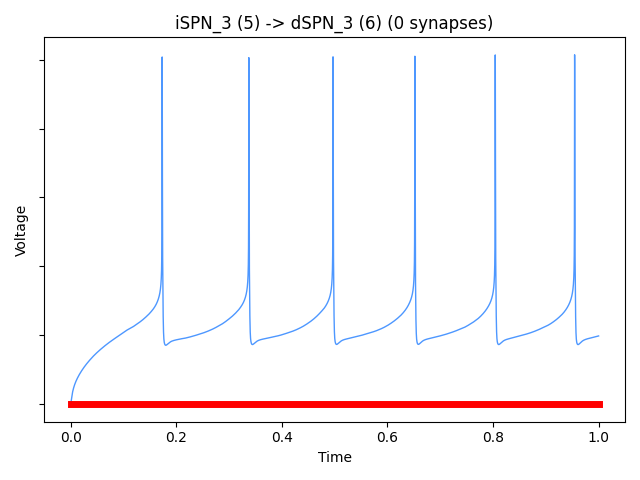

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Current-injection-TopologyClique-6-pre-5-post-6.pdf


In [21]:
pr.plot_traces()